<a href="https://colab.research.google.com/github/Riturajkumari/Decision/blob/main/Decision_Tree_2_Assignt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**given a dataset (diabetes.csv) with the following variables:**
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

**Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.**

In [101]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [102]:
# import library
import pandas as pd


In [103]:
df= pd.read_csv('/content/drive/MyDrive/Decision tree Classifier/diabetes.csv')

In [104]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
# rows and column
df.shape

(768, 9)

In [106]:
# descriptive analysis
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


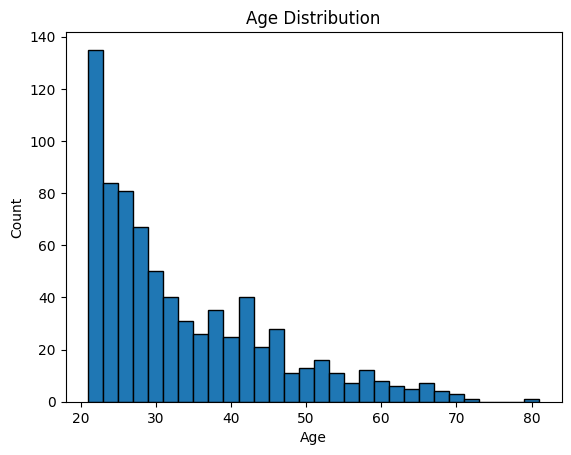

In [107]:
# Histogram for age
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [108]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

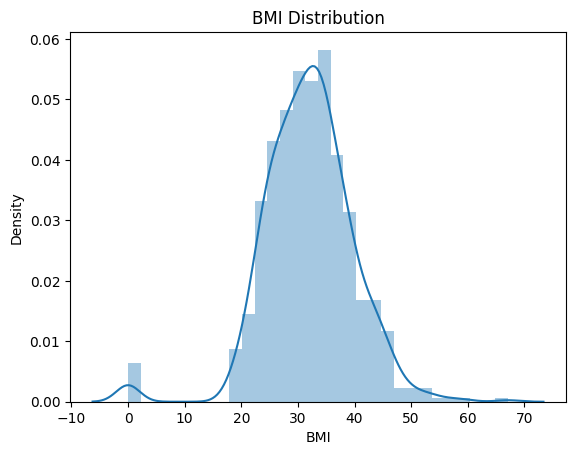

In [109]:
# Distribution plot for BMI
sns.distplot(df['BMI'], bins=30)
plt.title('BMI Distribution')
plt.show()

**Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.**

In [110]:
# missing value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

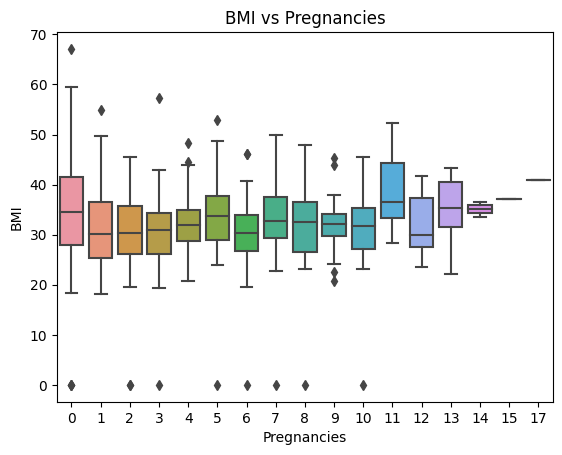

In [111]:
# Boxplot BMI vs Pregnancies classification, outliers
sns.boxplot(x='Pregnancies', y='BMI', data=df)
plt.title('BMI vs Pregnancies')
plt.show()

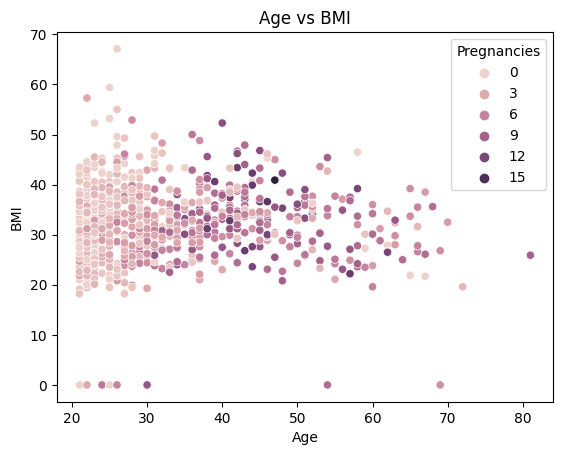

In [112]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='Age', y='BMI', hue='Pregnancies', data=df)
plt.title('Age vs BMI')
plt.show()

In [113]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [114]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.**

In [115]:
#Independent and dependent features
X=df.iloc[:,:-1]
y=df.Outcome

In [116]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

**Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.**

In [126]:
from sklearn.tree import DecisionTreeRegressor

In [127]:
## Post Pruning
treeclassifier=DecisionTreeRegressor()

In [128]:
treeclassifier.fit(X_train,y_train)

DecisionTreeRegressor()

In [129]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,0,0,24.0,1.022,34
223,7,142,60,33,190,28.8,0.687,61
393,4,116,72,12,87,22.1,0.463,37
766,1,126,60,0,0,30.1,0.349,47
570,3,78,70,0,0,32.5,0.270,39


In [135]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=700,
 max_samples=200, bootstrap=True, n_jobs=-1
 )
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7637795275590551

**Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.**

In [142]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [143]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[138  30]
 [ 30  56]]
0.7637795275590551
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       168
           1       0.65      0.65      0.65        86

    accuracy                           0.76       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.76      0.76      0.76       254



**Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.**

[Text(0.6107878989361702, 0.9615384615384616, 'x[1] <= 154.5\nsquared_error = 0.229\nsamples = 514\nvalue = 0.354'),
 Text(0.32529920212765956, 0.8846153846153846, 'x[7] <= 30.5\nsquared_error = 0.191\nsamples = 432\nvalue = 0.257'),
 Text(0.1848404255319149, 0.8076923076923077, 'x[1] <= 127.5\nsquared_error = 0.12\nsamples = 251\nvalue = 0.139'),
 Text(0.1196808510638298, 0.7307692307692307, 'x[5] <= 45.45\nsquared_error = 0.077\nsamples = 203\nvalue = 0.084'),
 Text(0.10904255319148937, 0.6538461538461539, 'x[0] <= 6.5\nsquared_error = 0.065\nsamples = 200\nvalue = 0.07'),
 Text(0.09840425531914894, 0.5769230769230769, 'x[1] <= 104.5\nsquared_error = 0.061\nsamples = 199\nvalue = 0.065'),
 Text(0.0425531914893617, 0.5, 'x[4] <= 156.0\nsquared_error = 0.018\nsamples = 107\nvalue = 0.019'),
 Text(0.02127659574468085, 0.4230769230769231, 'x[3] <= 41.0\nsquared_error = 0.01\nsamples = 104\nvalue = 0.01'),
 Text(0.010638297872340425, 0.34615384615384615, 'squared_error = 0.0\nsamples = 97

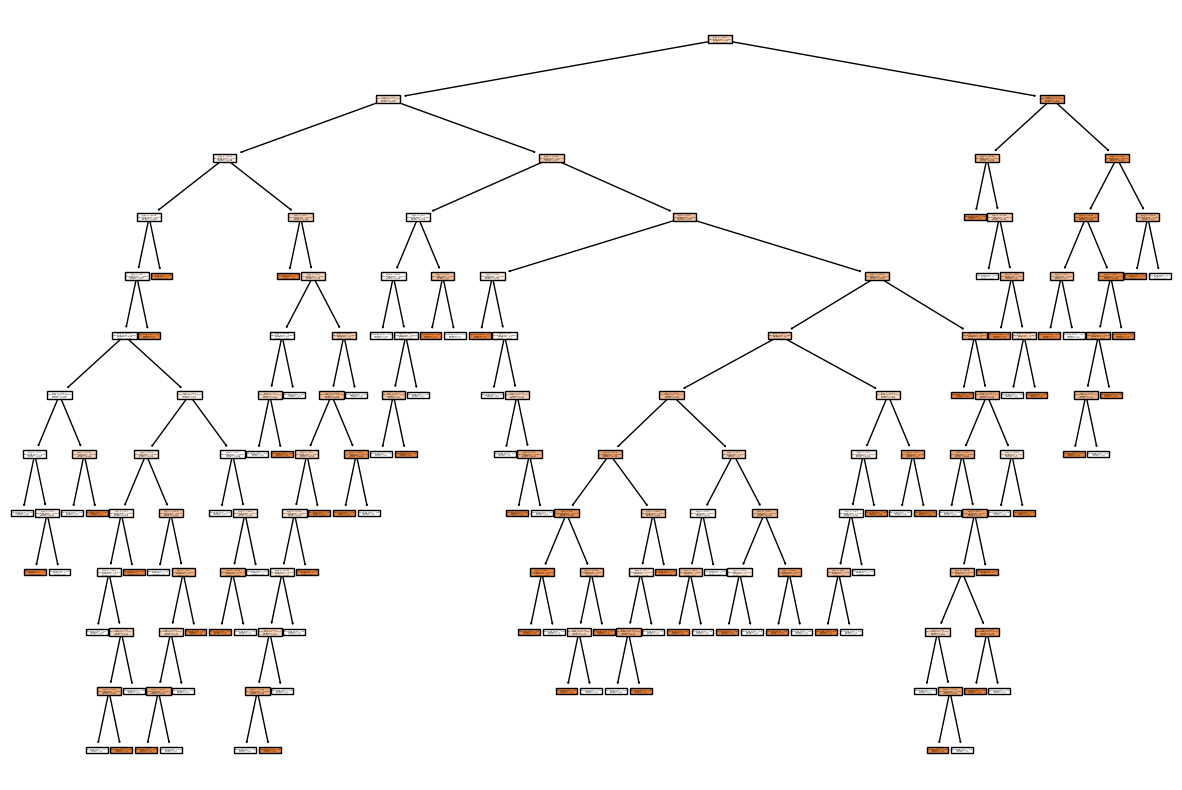

In [144]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

**Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.**

In [145]:
## Post Pruning with max_depth =2
treeclassifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[1] <= 154.5\nentropy = 0.938\nsamples = 514\nvalue = [332, 182]'),
 Text(0.25, 0.5, 'x[5] <= 26.35\nentropy = 0.822\nsamples = 432\nvalue = [321, 111]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.23\nsamples = 107\nvalue = [103, 4]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.914\nsamples = 325\nvalue = [218, 107]'),
 Text(0.75, 0.5, 'x[5] <= 28.7\nentropy = 0.569\nsamples = 82\nvalue = [11, 71]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.422\nsamples = 70\nvalue = [6, 64]')]

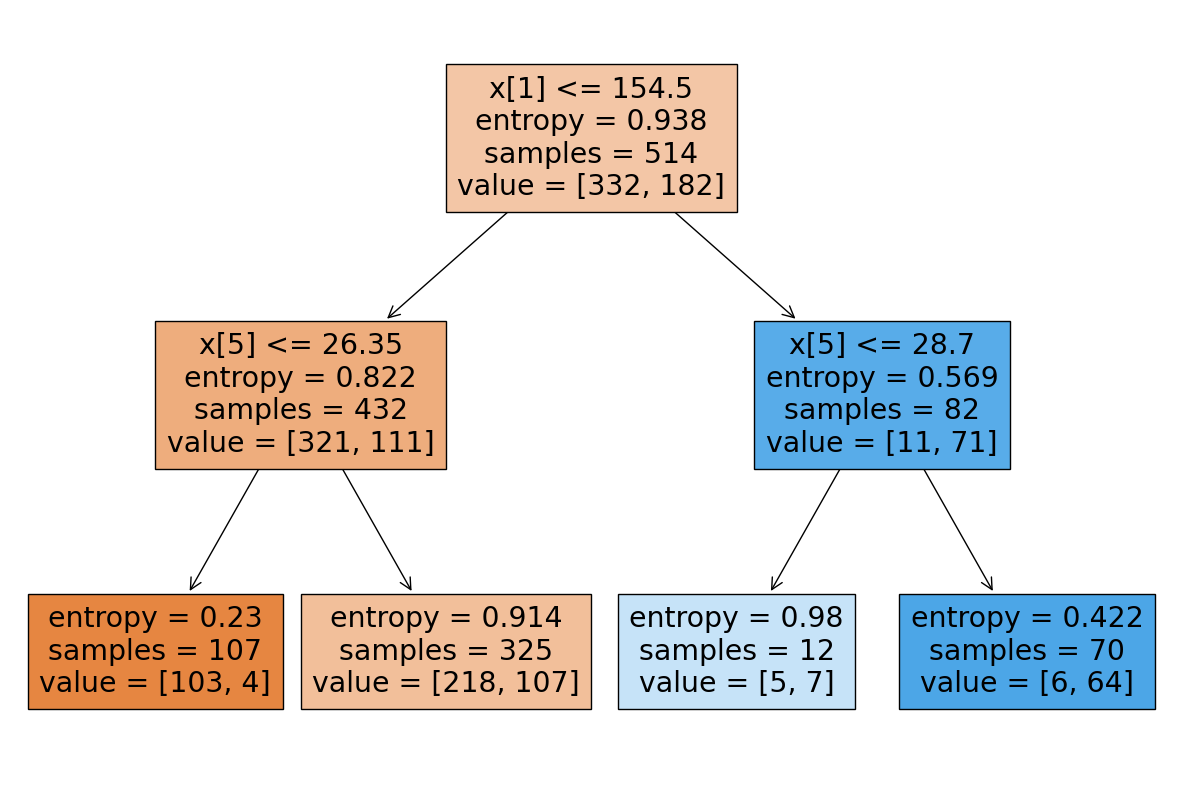

In [146]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)